In [1]:
import numpy as np  # numpy!
import seaborn as sns # visualisation!
import matplotlib.pyplot as plt # visualisation!
import pandas as pd # dataframes & data analysis!
import datetime

from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#We will beed a modellinglibraru: Statsmodels
import statsmodels.api as sm # contains the model(s)
import statsmodels.tools # contains the metrics and others 

In [2]:
house_month = pd.read_csv('housing_in_london_monthly_variables.csv')
house_year = pd.read_csv('housing_in_london_yearly_variables.csv')

## About Dataset

**Update 29-04-2020**: The data is now split into two files based on the variable collection frequency (monthly and yearly). Additional variables added: area size in hectares, number of jobs in the area, number of people living in the area.

<u>Content</u>

The datasets is primarily centered around the housing market of London. However, it contains a lot of additional relevant data:

- Monthly average house prices
- Yearly number of houses
- Yearly number of houses sold
- Yearly percentage of households that recycle
- Yearly life satisfaction
- Yearly median salary of the residents of the area
- Yearly mean salary of the residents of the area
- Monthly number of crimes committed
- Yearly number of jobs
- Yearly number of people living in the area
- Area size in hectares

The data is split by areas of London called boroughs (a flag exists to identify these), but some of the variables have other geographical UK regions for reference (like England, North East, etc.). There have been no changes made to the data except for melting it into a long format from the original tables.

### Checking that the data structure matches the metadata

In [3]:
print(house_month.shape)
print(house_year.shape)

(13549, 7)
(1071, 12)


In [4]:
print(house_month.columns)
print(house_year.columns)

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag'],
      dtype='object')
Index(['code', 'area', 'date', 'median_salary', 'life_satisfaction',
       'mean_salary', 'recycling_pct', 'population_size', 'number_of_jobs',
       'area_size', 'no_of_houses', 'borough_flag'],
      dtype='object')


## Null Handelling

In [5]:
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() ## How many nulls in each column
    total_cnt = len(dataframe) ## Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) ## Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) ## Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

In [6]:
null_vals(house_month)

,null,percent
no_of_crimes,6110,45.096
houses_sold,94,0.694
date,0,0.000
area,0,0.000
average_price,0,0.000
code,0,0.000
borough_flag,0,0.000


In [7]:
house_month.dropna(
    axis = 0, # default or we can write axis = 'row'
    how = 'any', # default mean if any values are NA then drop the row. 'all' means if all the row is missing then drop it
    inplace = True # makes change permanent
) # dropping nulls

In [8]:
null_vals(house_month)

,null,percent
date,0,0.0
area,0,0.0
average_price,0,0.0
code,0,0.0
houses_sold,0,0.0
no_of_crimes,0,0.0
borough_flag,0,0.0


In [9]:
house_month.shape

(7375, 7)

In [10]:
null_vals(house_year)

,null,percent
life_satisfaction,719,67.134
area_size,405,37.815
no_of_houses,405,37.815
recycling_pct,211,19.701
number_of_jobs,140,13.072
population_size,53,4.949
median_salary,22,2.054
code,0,0.000
area,0,0.000
date,0,0.000


## Creating another dataframe with all the information

In [11]:
house_df = pd.merge(house_month, house_year)
house_df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses
0,2001-12-01,city of london,362204,E09000001,17.0,0.0,1,39104.0,NaN,62819,0,7359.0,339000.0,315.0,5009.0
1,2002-12-01,city of london,262197,E09000001,44.0,0.0,1,39750.0,NaN,56450,1,7280.0,344000.0,315.0,5117.0
2,2003-12-01,city of london,305556,E09000001,38.0,0.0,1,41795.0,NaN,64272,8,7115.0,344000.0,315.0,5126.0
3,2004-12-01,city of london,331161,E09000001,14.0,0.0,1,43347.0,NaN,66628,14,7118.0,332000.0,315.0,5263.0
4,2005-12-01,city of london,339626,E09000001,30.0,0.0,1,45000.0,NaN,74004,18,7131.0,343000.0,315.0,5374.0


In [12]:
house_df.shape

(585, 15)

In [13]:
null_vals(house_df)

,null,percent
life_satisfaction,329,56.239
median_salary,9,1.538
date,0,0.000
area,0,0.000
average_price,0,0.000
code,0,0.000
houses_sold,0,0.000
no_of_crimes,0,0.000
borough_flag,0,0.000
mean_salary,0,0.000


In [14]:
house_df.dropna(
    axis = 0, # default or we can write axis = 'row'
    how = 'any', # default mean if any values are NA then drop the row. 'all' means if all the row is missing then drop it
    inplace = True # makes change permanent
) # dropping nulls

In [15]:
null_vals(house_df)

,null,percent
date,0,0.0
area,0,0.0
average_price,0,0.0
code,0,0.0
houses_sold,0,0.0
no_of_crimes,0,0.0
borough_flag,0,0.0
median_salary,0,0.0
life_satisfaction,0,0.0
mean_salary,0,0.0


In [16]:
house_df.shape

(251, 15)

In [17]:
house_df = house_df.loc[house_df['mean_salary'] != '#', :]

With the information seen from each table and from removing the nulls, I will use the house_month and house_df tables to compare machine learning models to see if there is a difference in performance. 

This is becauce house_month has more observations but less features while house_df has less observations but more features.

## Feature Engineering

In [18]:
print(house_month.columns)
print(house_df.columns)

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag'],
      dtype='object')
Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag', 'median_salary', 'life_satisfaction', 'mean_salary',
       'recycling_pct', 'population_size', 'number_of_jobs', 'area_size',
       'no_of_houses'],
      dtype='object')


**house_month**

OHE : 
- Area
- Code

**house_df**

OHE:
- Area
- code

These columns will be encoded for continuous models.

The other column are not classification columns and so do not need to be encoded

In [19]:
def feature_engineering(df):
    df = df.copy()
    df = pd.get_dummies(df,                 # Select data to dummy
                    columns=['area','code'],# Which columns to OHE
                    prefix = None,               # Wish to add a prefix to the results?
                    drop_first = True,          # Want to drop the first dimension?
                    dtype = int)
    
    if 'mean_salary' in df.columns:
        df['mean_salary'] = df['mean_salary'].astype(int)
    
    if 'recycling_pct' in df.columns:
        df['recycling_pct'] = df['recycling_pct'].astype(int)
    
    df['const'] = 1.0 #adding a constant because we'll use statsmodels
    
    return df

In [20]:
house_month_ohe = feature_engineering(house_month)
house_df_ohe = feature_engineering(house_df)

## Correlation checks

The heatmaps below shows evidence of muticolinearity

In [21]:
house_month_ohe.columns

Index(['date', 'average_price', 'houses_sold', 'no_of_crimes', 'borough_flag',
       'area_barnet', 'area_bexley', 'area_brent', 'area_bromley',
       'area_camden', 'area_city of london', 'area_croydon', 'area_ealing',
       'area_enfield', 'area_greenwich', 'area_hackney',
       'area_hammersmith and fulham', 'area_haringey', 'area_harrow',
       'area_havering', 'area_hillingdon', 'area_hounslow', 'area_islington',
       'area_kensington and chelsea', 'area_kingston upon thames',
       'area_lambeth', 'area_lewisham', 'area_merton', 'area_newham',
       'area_redbridge', 'area_richmond upon thames', 'area_southwark',
       'area_sutton', 'area_tower hamlets', 'area_waltham forest',
       'area_wandsworth', 'area_westminster', 'code_E09000002',
       'code_E09000003', 'code_E09000004', 'code_E09000005', 'code_E09000006',
       'code_E09000007', 'code_E09000008', 'code_E09000009', 'code_E09000010',
       'code_E09000011', 'code_E09000012', 'code_E09000013', 'code_E0900001

In [22]:
house_month_area = house_month_ohe[['area_barnet', 'area_bexley', 'area_brent', 'area_bromley',
       'area_camden', 'area_city of london', 'area_croydon', 'area_ealing',
       'area_enfield', 'area_greenwich', 'area_hackney',
       'area_hammersmith and fulham', 'area_haringey', 'area_harrow',
       'area_havering', 'area_hillingdon', 'area_hounslow', 'area_islington',
       'area_kensington and chelsea', 'area_kingston upon thames',
       'area_lambeth', 'area_lewisham', 'area_merton', 'area_newham',
       'area_redbridge', 'area_richmond upon thames', 'area_southwark',
       'area_sutton', 'area_tower hamlets', 'area_waltham forest',
       'area_wandsworth', 'area_westminster']]

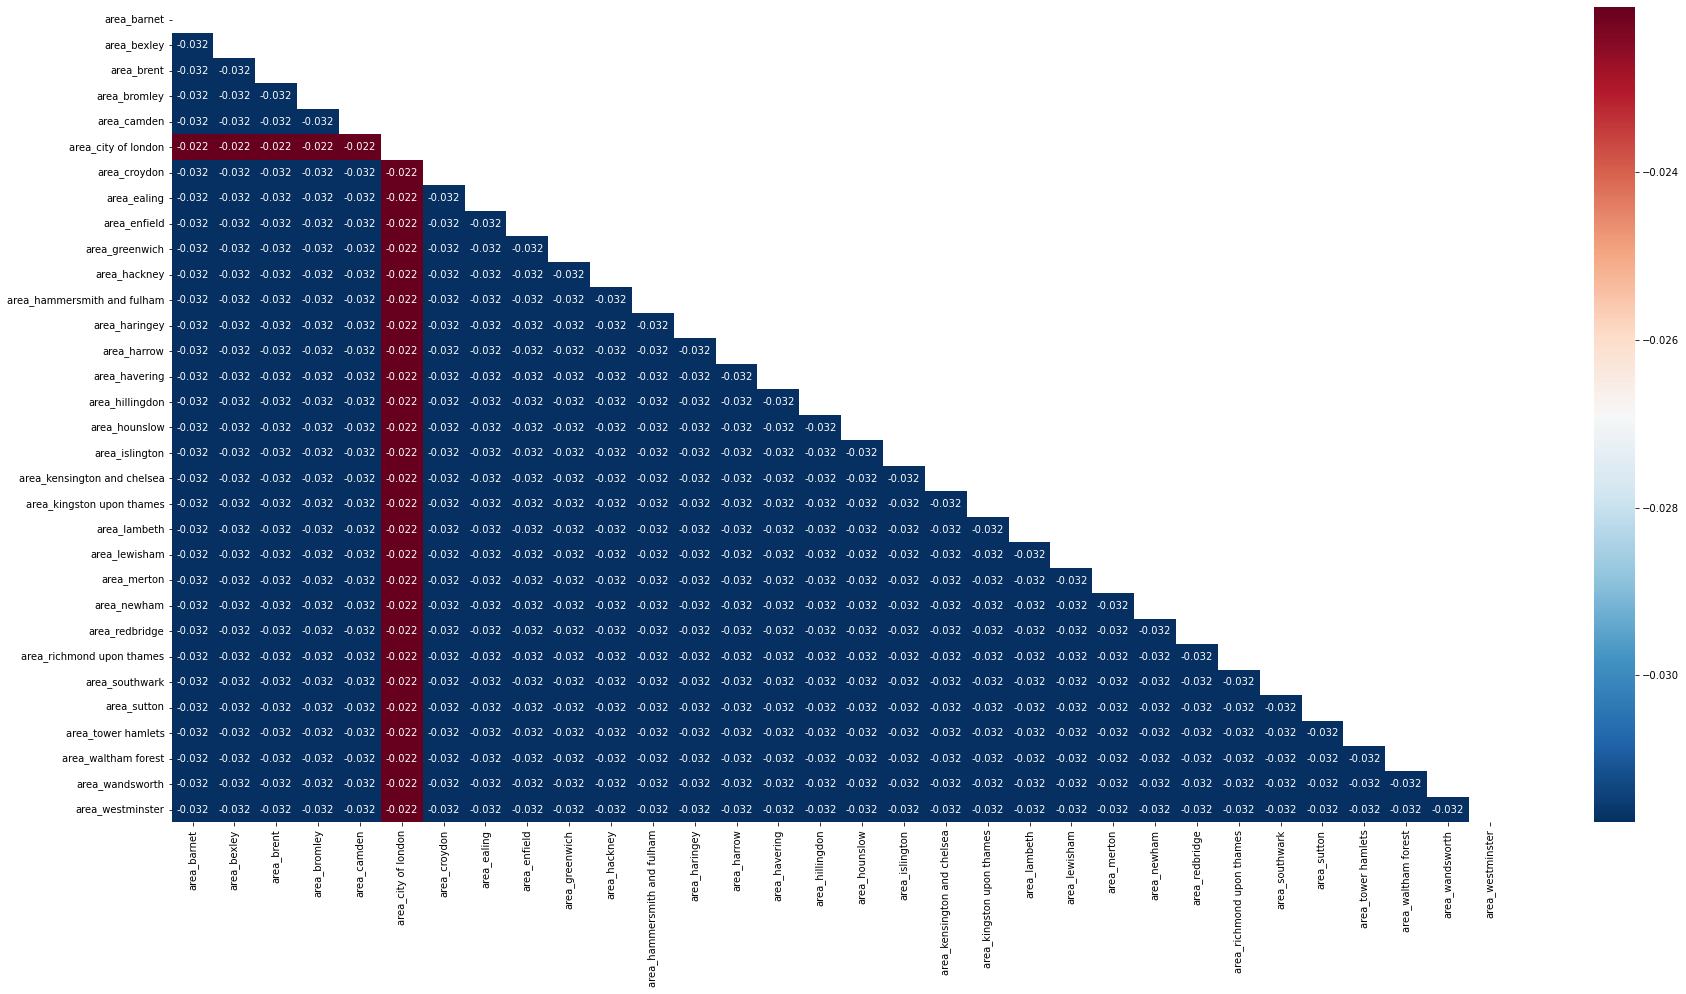

In [23]:
plt.figure(figsize = (30,15))

sns.heatmap(house_month_area.corr(), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(house_month_area.corr()))
plt.show()

In [24]:
house_month_code = house_month_ohe[['code_E09000002',
       'code_E09000003', 'code_E09000004', 'code_E09000005', 'code_E09000006',
       'code_E09000007', 'code_E09000008', 'code_E09000009', 'code_E09000010',
       'code_E09000011', 'code_E09000012', 'code_E09000013', 'code_E09000014',
       'code_E09000015', 'code_E09000016', 'code_E09000017', 'code_E09000018',
       'code_E09000019', 'code_E09000020', 'code_E09000021', 'code_E09000022',
       'code_E09000023', 'code_E09000024', 'code_E09000025', 'code_E09000026',
       'code_E09000027', 'code_E09000028', 'code_E09000029', 'code_E09000030',
       'code_E09000031', 'code_E09000032', 'code_E09000033']]

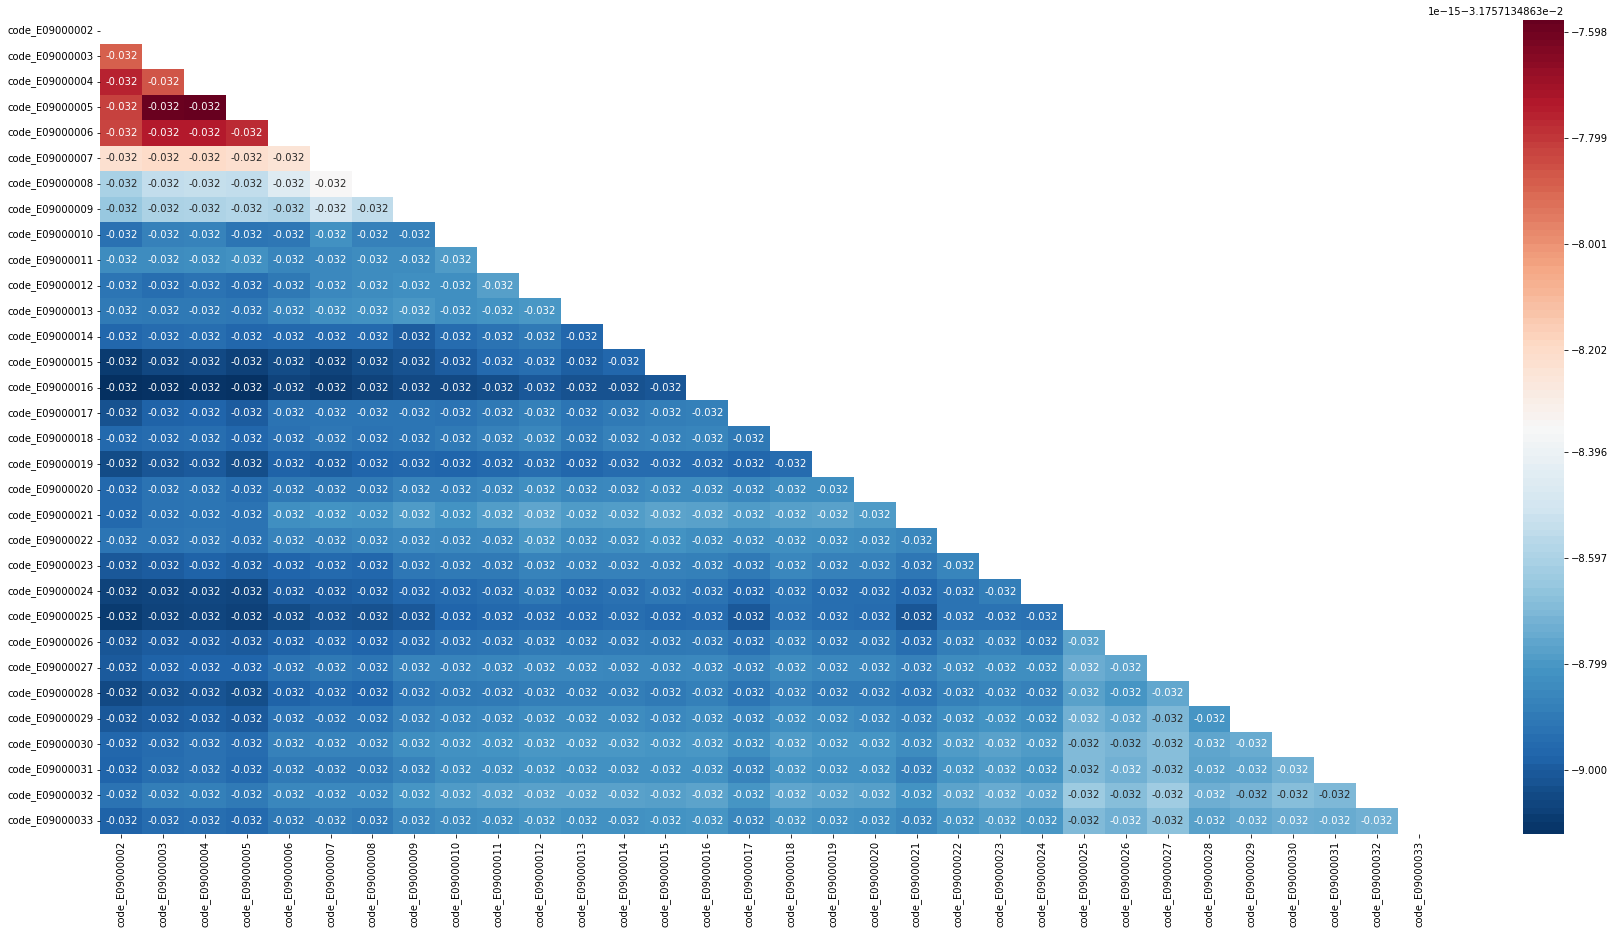

In [25]:
plt.figure(figsize = (30,15))

sns.heatmap(house_month_code.corr(), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(house_month_code.corr()))
plt.show()

This heatmap shows us that there is a correlation between the average price and certain columns

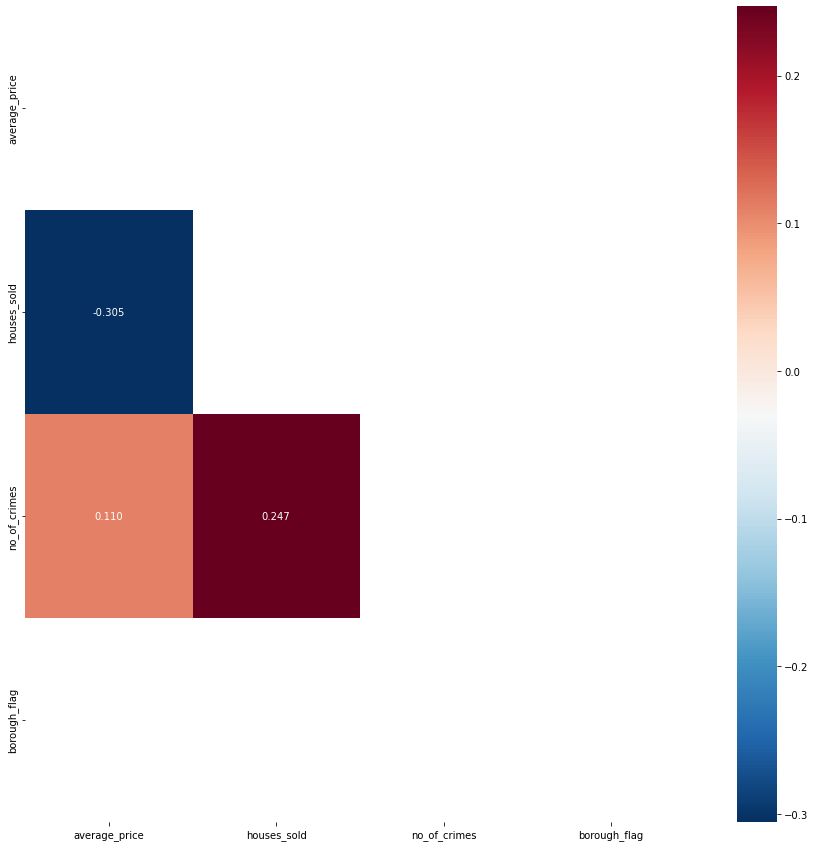

In [26]:
house = house_month[['date', 'average_price', 'houses_sold', 'no_of_crimes', 'borough_flag']]

plt.figure(figsize = (15,15))

sns.heatmap(house.corr(), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(house.corr()))
plt.show()

## Train/Test Split

### house_month data

In [27]:
house_month.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag'],
      dtype='object')

In [28]:
# The Train test splitting 
Xm = house_month.drop('average_price', axis=1) # The features
ym = house_month['average_price'] # The Target

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, # The features
                                                    ym, # The Target
                                                    test_size=0.2, #what % are we dedicating to the testing set ?
                                                    random_state=200 #Random set, the number specifies the specific ramdon shuffel
                                                   )

In [29]:
# Check tkhat the incidies ended up the same in both sets
print(all(Xm_train.index == ym_train.index))
print(all(Xm_test.index == ym_test.index))

True
True


In [30]:
Xm_train_fe = feature_engineering(Xm_train)
Xm_test_fe = feature_engineering(Xm_test)

In [31]:
Xm_train_fe.columns

Index(['date', 'houses_sold', 'no_of_crimes', 'borough_flag', 'area_barnet',
       'area_bexley', 'area_brent', 'area_bromley', 'area_camden',
       'area_city of london', 'area_croydon', 'area_ealing', 'area_enfield',
       'area_greenwich', 'area_hackney', 'area_hammersmith and fulham',
       'area_haringey', 'area_harrow', 'area_havering', 'area_hillingdon',
       'area_hounslow', 'area_islington', 'area_kensington and chelsea',
       'area_kingston upon thames', 'area_lambeth', 'area_lewisham',
       'area_merton', 'area_newham', 'area_redbridge',
       'area_richmond upon thames', 'area_southwark', 'area_sutton',
       'area_tower hamlets', 'area_waltham forest', 'area_wandsworth',
       'area_westminster', 'code_E09000002', 'code_E09000003',
       'code_E09000004', 'code_E09000005', 'code_E09000006', 'code_E09000007',
       'code_E09000008', 'code_E09000009', 'code_E09000010', 'code_E09000011',
       'code_E09000012', 'code_E09000013', 'code_E09000014', 'code_E090000

## Creating Models and Scores

**Linear Regression**

In [32]:
feature_cols_lin_m = ['houses_sold', 'no_of_crimes', 'borough_flag', 'area_barnet',
       'area_bexley', 'area_brent', 'area_bromley', 'area_camden',
       'area_city of london', 'area_croydon', 'area_ealing', 'area_enfield',
       'area_greenwich', 'area_hackney', 'area_hammersmith and fulham',
       'area_haringey', 'area_harrow', 'area_havering', 'area_hillingdon',
       'area_hounslow', 'area_islington', 'area_kensington and chelsea',
       'area_kingston upon thames', 'area_lambeth', 'area_lewisham',
       'area_merton', 'area_newham', 'area_redbridge',
       'area_richmond upon thames', 'area_southwark', 'area_sutton',
       'area_tower hamlets', 'area_waltham forest', 'area_wandsworth',
       'area_westminster', 'code_E09000002', 'code_E09000003',
       'code_E09000004', 'code_E09000005', 'code_E09000006', 'code_E09000007',
       'code_E09000008', 'code_E09000009', 'code_E09000010', 'code_E09000011',
       'code_E09000012', 'code_E09000013', 'code_E09000014', 'code_E09000015',
       'code_E09000016', 'code_E09000017', 'code_E09000018', 'code_E09000019',
       'code_E09000020', 'code_E09000021', 'code_E09000022', 'code_E09000023',
       'code_E09000024', 'code_E09000025', 'code_E09000026', 'code_E09000027',
       'code_E09000028', 'code_E09000029', 'code_E09000030', 'code_E09000031',
       'code_E09000032', 'code_E09000033', 'const']

In [33]:
## create and train an OLS linear regression
lin_reg_m = sm.OLS(ym_train, Xm_train_fe[feature_cols_lin_m]) #creating the model (#target, features)
lin_results_m = lin_reg_m.fit() #fit our model and store it 
lin_results_m.summary() # take a look at out results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     333.2
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:20:53   Log-Likelihood:                -76911.
No. Observations:                5900   AIC:                         1.539e+05
Df Residuals:                    5865   BIC:                         1.541e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
houses_sold                  -353.1610     13.497    -26.166      0.000    -379.620    -326.702
no_of_crimes                 -125.2701      4.947    -25.321      0.000    -134.968    -115.572
borough_flag                 3.418e+05   4734.995     72.179      0.000    3.32e+05    3.51e+05
area_barnet                  5.711e+04   4222.943     13.525      0.000    4.88e+04    6.54e+04
area_bexley                 -9.416e+04   4473.544    -21.048      0.000   -1.03e+05   -8.54e+04
area_brent                   1.445e+04   4198.943      3.443      0.001    6223.427    2.27e+04
area_bromley                 2.022e+04   4358.595      4.639      0.000    1.17e+04    2.88e+04
area_camden                  1.723e+05   4996.344     34.475      0.000    1.62e+05    1.82e+05
area_city of london         -3.403e+05   1.48e+04    -23.003      0.000   -3.69e+05   -3.11e+05
area_croydon                 2.993e+04   4365.150      6.857      0.000    2.14e+04    3.85e+04
area_ealing                  4.515e+04   4373.901     10.323      0.000    3.66e+04    5.37e+04
area_enfield                -1.665e+04   4136.800     -4.024      0.000   -2.48e+04   -8537.385
area_greenwich               -2.22e+04   4091.444     -5.425      0.000   -3.02e+04   -1.42e+04
area_hackney                 3.472e+04   4419.640      7.857      0.000    2.61e+04    4.34e+04
area_hammersmith and fulham  8.463e+04   4135.865     20.463      0.000    7.65e+04    9.27e+04
area_haringey                 2.86e+04   4199.889      6.810      0.000    2.04e+04    3.68e+04
area_harrow                  -6.12e+04   4453.010    -13.743      0.000   -6.99e+04   -5.25e+04
area_havering               -6.862e+04   4266.244    -16.084      0.000    -7.7e+04   -6.03e+04
area_hillingdon             -9435.7769   4089.107     -2.308      0.021   -1.75e+04   -1419.619
area_hounslow               -2.697e+04   4017.880     -6.713      0.000   -3.48e+04   -1.91e+04
area_islington               7.347e+04   4317.515     17.017      0.000     6.5e+04    8.19e+04
area_kensington and chelsea  2.619e+05   4072.356     64.300      0.000    2.54e+05     2.7e+05
area_kingston upon thames   -7.177e+04   4775.223    -15.029      0.000   -8.11e+04   -6.24e+04
area_lambeth                 8.987e+04   4872.023     18.446      0.000    8.03e+04    9.94e+04
area_lewisham               -6281.5999   4126.605     -1.522      0.128   -1.44e+04    1808.068
area_merton                 -4.878e+04   4495.551    -10.851      0.000   -5.76e+04      -4e+04
area_newham                  2134.6290   4575.765      0.467      0.641   -6835.556    1.11e+04
area_redbridge              -2.551e+04   4146.446     -6.153      0.000   -3.36e+04   -1.74e+04
area_richmond upon thames     518.3627   4722.702      0.110      0.913   -8739.874    9776.599
area_southw

In [34]:
## What about the actual performance?

#get out pridictions and store them in y_pred
ym_pred = lin_results_m.predict(Xm_train_fe[feature_cols_lin_m])

#get the RMSE od our model: y_train(real) against y_pred (predicted)
rmse_m = statsmodels.tools.eval_measures.rmse(ym_train, ym_pred) #(real value, predicted)

#lets print out the RMSE
print(f'RMSE score: {rmse_m}')

RMSE score: 110947.22142182357


In [35]:
#lets predict on test as well
#y_test_pred holds the prediction on the testing set
ym_test_pred = lin_results_m.predict(Xm_test_fe[feature_cols_lin_m])

#get the testing rmse
rmse_m_test = statsmodels.tools.eval_measures.rmse(ym_test, ym_test_pred)

#print it out
print(f'RMSE test score: {rmse_m_test}')

RMSE test score: 110461.33559413078


In [36]:
# Define your feature sets
feature_sets = {
    "general_area_info": ['houses_sold', 'no_of_crimes', 'borough_flag'],
    "area_info": ['area_barnet', 'area_bexley', 'area_brent', 'area_bromley', 'area_camden',
                  'area_city of london', 'area_croydon', 'area_ealing', 'area_enfield',
                  'area_greenwich', 'area_hackney', 'area_hammersmith and fulham',
                  'area_haringey', 'area_harrow', 'area_havering', 'area_hillingdon',
                  'area_hounslow', 'area_islington', 'area_kensington and chelsea',
                  'area_kingston upon thames', 'area_lambeth', 'area_lewisham',
                  'area_merton', 'area_newham', 'area_redbridge',
                  'area_richmond upon thames', 'area_southwark', 'area_sutton',
                  'area_tower hamlets', 'area_waltham forest', 'area_wandsworth',
                  'area_westminster'],
    "area_code_info": ['code_E09000002', 'code_E09000003', 'code_E09000004', 'code_E09000005', 'code_E09000006',
                       'code_E09000007', 'code_E09000008', 'code_E09000009', 'code_E09000010', 'code_E09000011',
                       'code_E09000012', 'code_E09000013', 'code_E09000014', 'code_E09000015', 'code_E09000016',
                       'code_E09000017', 'code_E09000018', 'code_E09000019', 'code_E09000020', 'code_E09000021',
                       'code_E09000022', 'code_E09000023', 'code_E09000024', 'code_E09000025', 'code_E09000026',
                       'code_E09000027', 'code_E09000028', 'code_E09000029', 'code_E09000030', 'code_E09000031',
                       'code_E09000032', 'code_E09000033'],
    "all_info": ['houses_sold', 'no_of_crimes', 'borough_flag', 'area_barnet',
                 'area_bexley', 'area_brent', 'area_bromley', 'area_camden',
                 'area_city of london', 'area_croydon', 'area_ealing', 'area_enfield',
                 'area_greenwich', 'area_hackney', 'area_hammersmith and fulham',
                 'area_haringey', 'area_harrow', 'area_havering', 'area_hillingdon',
                 'area_hounslow', 'area_islington', 'area_kensington and chelsea',
                 'area_kingston upon thames', 'area_lambeth', 'area_lewisham',
                 'area_merton', 'area_newham', 'area_redbridge',
                 'area_richmond upon thames', 'area_southwark', 'area_sutton',
                 'area_tower hamlets', 'area_waltham forest', 'area_wandsworth',
                 'area_westminster', 'code_E09000002', 'code_E09000003',
                 'code_E09000004', 'code_E09000005', 'code_E09000006', 'code_E09000007',
                 'code_E09000008', 'code_E09000009', 'code_E09000010', 'code_E09000011',
                 'code_E09000012', 'code_E09000013', 'code_E09000014', 'code_E09000015',
                 'code_E09000016', 'code_E09000017', 'code_E09000018', 'code_E09000019',
                 'code_E09000020', 'code_E09000021', 'code_E09000022', 'code_E09000023',
                 'code_E09000024', 'code_E09000025', 'code_E09000026', 'code_E09000027',
                 'code_E09000028', 'code_E09000029', 'code_E09000030', 'code_E09000031',
                 'code_E09000032', 'code_E09000033']
}
# Getting the best feature set with the best rmse
best_rmse = float('inf')
best_feature_set = None

for feature_set_name, features in feature_sets.items():
    print(f"Processing feature set: {feature_set_name}")
    
    # Train the OLS linear regression model
    lin_reg_m = sm.OLS(ym_train, Xm_train_fe[features])
    lin_results_m = lin_reg_m.fit()
    
    # Get predictions for the train set
    ym_train_pred = lin_results_m.predict(Xm_train_fe[features])
    rmse_train = statsmodels.tools.eval_measures.rmse(ym_train, ym_train_pred)
    
    # Get predictions for the test set
    ym_test_pred = lin_results_m.predict(Xm_test_fe[features])
    rmse_test = statsmodels.tools.eval_measures.rmse(ym_test, ym_test_pred)
    
    # Print RMSE results
    print(f"Train RMSE: {rmse_train}")
    print(f"Test RMSE: {rmse_test}")
    
    # Determine the best feature set based on the test RMSE
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_feature_set = feature_set_name
    
    print("-" * 40)

# Print the best feature set
print(f"The best feature set is: {best_feature_set} with a Test RMSE of {best_rmse}")


Processing feature set: general_area_info
Train RMSE: 177593.60688990806
Test RMSE: 167543.58273918738
----------------------------------------
Processing feature set: area_info
Train RMSE: 132527.7220910693
Test RMSE: 130372.17733397077
----------------------------------------
Processing feature set: area_code_info
Train RMSE: 134261.54649570023
Test RMSE: 134458.08498445808
----------------------------------------
Processing feature set: all_info
Train RMSE: 110947.22142182357
Test RMSE: 110461.33559413084
----------------------------------------
The best feature set is: all_info with a Test RMSE of 110461.33559413084


## Logistic Regression, Decision Tree, Random Forrest

### Turning the average price into categorical data

In [37]:
# Transform the continuous target variable into categorical bins
# Using pd.cut
bins_m = [ym_train.min(), 100000, 500000, ym_train.max()]
labels = [0, 1, 2]
ym_train_categorical = pd.cut(ym_train, bins=bins_m, labels=labels, include_lowest=True).astype(int)
ym_test_categorical = pd.cut(ym_test, bins=bins_m, labels=labels, include_lowest=True).astype(int)

In [38]:
#Feature Combinations
feature_sets = {
    "general_area_info": ['houses_sold', 'no_of_crimes', 'borough_flag'],
    "area_info": ['area_barnet',
       'area_bexley', 'area_brent', 'area_bromley', 'area_camden',
       'area_city of london', 'area_croydon', 'area_ealing', 'area_enfield',
       'area_greenwich', 'area_hackney', 'area_hammersmith and fulham',
       'area_haringey', 'area_harrow', 'area_havering', 'area_hillingdon',
       'area_hounslow', 'area_islington', 'area_kensington and chelsea',
       'area_kingston upon thames', 'area_lambeth', 'area_lewisham',
       'area_merton', 'area_newham', 'area_redbridge',
       'area_richmond upon thames', 'area_southwark', 'area_sutton',
       'area_tower hamlets', 'area_waltham forest', 'area_wandsworth',
       'area_westminster'],
    "area_code_info": ['code_E09000002', 'code_E09000003',
       'code_E09000004', 'code_E09000005', 'code_E09000006', 'code_E09000007',
       'code_E09000008', 'code_E09000009', 'code_E09000010', 'code_E09000011',
       'code_E09000012', 'code_E09000013', 'code_E09000014', 'code_E09000015',
       'code_E09000016', 'code_E09000017', 'code_E09000018', 'code_E09000019',
       'code_E09000020', 'code_E09000021', 'code_E09000022', 'code_E09000023',
       'code_E09000024', 'code_E09000025', 'code_E09000026', 'code_E09000027',
       'code_E09000028', 'code_E09000029', 'code_E09000030', 'code_E09000031',
       'code_E09000032', 'code_E09000033'],
    "all_info": ['houses_sold', 'no_of_crimes', 'borough_flag', 'area_barnet',
       'area_bexley', 'area_brent', 'area_bromley', 'area_camden',
       'area_city of london', 'area_croydon', 'area_ealing', 'area_enfield',
       'area_greenwich', 'area_hackney', 'area_hammersmith and fulham',
       'area_haringey', 'area_harrow', 'area_havering', 'area_hillingdon',
       'area_hounslow', 'area_islington', 'area_kensington and chelsea',
       'area_kingston upon thames', 'area_lambeth', 'area_lewisham',
       'area_merton', 'area_newham', 'area_redbridge',
       'area_richmond upon thames', 'area_southwark', 'area_sutton',
       'area_tower hamlets', 'area_waltham forest', 'area_wandsworth',
       'area_westminster', 'code_E09000002', 'code_E09000003',
       'code_E09000004', 'code_E09000005', 'code_E09000006', 'code_E09000007',
       'code_E09000008', 'code_E09000009', 'code_E09000010', 'code_E09000011',
       'code_E09000012', 'code_E09000013', 'code_E09000014', 'code_E09000015',
       'code_E09000016', 'code_E09000017', 'code_E09000018', 'code_E09000019',
       'code_E09000020', 'code_E09000021', 'code_E09000022', 'code_E09000023',
       'code_E09000024', 'code_E09000025', 'code_E09000026', 'code_E09000027',
       'code_E09000028', 'code_E09000029', 'code_E09000030', 'code_E09000031',
       'code_E09000032', 'code_E09000033']
}

# Comparing the different models, with different features to see if which combinations will give the best rmse

for feature_set_name, features in feature_sets.items():
    X_train = Xm_train_fe[features]
    X_test = Xm_test_fe[features]
    y_train = ym_train_categorical
    y_test = ym_test_categorical
    
    # Logistic Regression
    lr_model = LogisticRegression(max_iter=10000)
    lr_model.fit(X_train, y_train)
    y_train_pred_lr = lr_model.predict(X_train)
    y_test_pred_lr = lr_model.predict(X_test)
    rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
    rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
    
    # Decision Tree Regressor
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    y_train_pred_dt = dt_model.predict(X_train)
    y_test_pred_dt = dt_model.predict(X_test)
    rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
    rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
    
    # Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_train_pred_rf = rf_model.predict(X_train)
    y_test_pred_rf = rf_model.predict(X_test)
    rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
    rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
    
    # Print RMSE results
    print(f"Feature Set: {feature_set_name}")
    print(f"Logistic Regression - Train RMSE: {rmse_train_lr}, Test RMSE: {rmse_test_lr}")
    print(f"Decision Tree - Train RMSE: {rmse_train_dt}, Test RMSE: {rmse_test_dt}")
    print(f"Random Forest - Train RMSE: {rmse_train_rf}, Test RMSE: {rmse_test_rf}")
    
    # Determine the best model based on the lowest test RMSE
    best_model_name = min(
        [('Logistic Regression', rmse_test_lr), 
         ('Decision Tree', rmse_test_dt), 
         ('Random Forest', rmse_test_rf)],
        key=lambda x: x[1]
    )[0]
    
    print(f"Best model for {feature_set_name}: {best_model_name}")
    print("-" * 40)

Feature Set: general_area_info
Logistic Regression - Train RMSE: 0.36638407189122346, Test RMSE: 0.3654576884317777
Decision Tree - Train RMSE: 0.009205746178983234, Test RMSE: 0.4472135954999579
Random Forest - Train RMSE: 0.13004918409004293, Test RMSE: 0.3520003965767754
Best model for general_area_info: Random Forest
----------------------------------------
Feature Set: area_info
Logistic Regression - Train RMSE: 0.33723702874880457, Test RMSE: 0.3454302156706982
Decision Tree - Train RMSE: 0.28087806691764106, Test RMSE: 0.28377537200018504
Random Forest - Train RMSE: 0.280886332795951, Test RMSE: 0.28368071000085654
Best model for area_info: Random Forest
----------------------------------------
Feature Set: area_code_info
Logistic Regression - Train RMSE: 0.33723702874880457, Test RMSE: 0.3454302156706982
Decision Tree - Train RMSE: 0.28087806691764106, Test RMSE: 0.28377537200018504
Random Forest - Train RMSE: 0.280886332795951, Test RMSE: 0.28368071000085654
Best model for are

### house_df data

In [39]:
house_df.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag', 'median_salary', 'life_satisfaction', 'mean_salary',
       'recycling_pct', 'population_size', 'number_of_jobs', 'area_size',
       'no_of_houses'],
      dtype='object')

In [40]:
# Making sure I use a random state that will ensure the right columns in the test and training data
random_state_ = 0

while True:
    Xd = house_df.drop('average_price', axis=1)  # The features
    yd = house_df['average_price']  # The Target
    
    # Perform train-test split with the current random state
    Xd_train, Xd_test, yd_train, yd_test = train_test_split(
        Xd, yd, test_size=0.2, random_state=random_state_)
    
    # Apply feature engineering
    Xd_train_fe = feature_engineering(Xd_train)
    Xd_test_fe = feature_engineering(Xd_test)
    
    # Check if the columns match
    if list(Xd_train_fe.columns) == list(Xd_test_fe.columns):
        break
    
    # Increment the random state
    random_state_ += 1
    
    # Optionally, you can add a condition to avoid infinite loop
    if random_state_ > 1000:
        print("Couldn't find matching columns within 100 random states.")
        break

print(f"Matching columns found with random state {random_state_}")

Matching columns found with random state 868


In [41]:
# The Train test splitting 
Xd = house_df.drop('average_price', axis=1) # The features
yd = house_df['average_price'] # The Target

Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, # The features
                                                    yd, # The Target
                                                    test_size=0.2, #what % are we dedicating to the testing set ?
                                                    random_state=random_state_ #Random set, the number specifies the specific ramdon shuffel
                                                   )

In [42]:
# Check tkhat the incidies ended up the same in both sets
print(all(Xd_train.index == yd_train.index))
print(all(Xd_test.index == yd_test.index))

True
True


In [43]:
#Apply feature engineerinf function to the training and test sets
Xd_train_fe = feature_engineering(Xd_train)
Xd_test_fe = feature_engineering(Xd_test)

In [44]:
list(Xd_train_fe.columns) == list(Xd_test_fe.columns)

True

Because of the way the encoding works the random split of the data, could mean the test and train data will have different number of columns and so this code ensures that I find a random state that will keep the columns the same.

In [45]:
Xd_train_fe.columns

Index(['date', 'houses_sold', 'no_of_crimes', 'borough_flag', 'median_salary',
       'life_satisfaction', 'mean_salary', 'recycling_pct', 'population_size',
       'number_of_jobs', 'area_size', 'no_of_houses', 'area_barnet',
       'area_bexley', 'area_brent', 'area_bromley', 'area_camden',
       'area_croydon', 'area_ealing', 'area_enfield', 'area_greenwich',
       'area_hackney', 'area_hammersmith and fulham', 'area_haringey',
       'area_harrow', 'area_havering', 'area_hillingdon', 'area_hounslow',
       'area_islington', 'area_kensington and chelsea',
       'area_kingston upon thames', 'area_lambeth', 'area_lewisham',
       'area_merton', 'area_newham', 'area_redbridge',
       'area_richmond upon thames', 'area_southwark', 'area_sutton',
       'area_tower hamlets', 'area_waltham forest', 'area_wandsworth',
       'area_westminster', 'code_E09000003', 'code_E09000004',
       'code_E09000005', 'code_E09000006', 'code_E09000007', 'code_E09000008',
       'code_E09000009', '

## Creating Models and Scores

**Linear Regression**

In [46]:
feature_cols_lin_d = ['houses_sold', 'no_of_crimes', 'borough_flag', 'median_salary',
       'life_satisfaction', 'mean_salary', 'recycling_pct', 'population_size',
       'number_of_jobs', 'area_size', 'no_of_houses', 'area_barnet',
       'area_bexley', 'area_brent', 'area_bromley', 'area_camden',
       'area_croydon', 'area_ealing', 'area_enfield', 'area_greenwich',
       'area_hackney', 'area_hammersmith and fulham', 'area_haringey',
       'area_harrow', 'area_havering', 'area_hillingdon', 'area_hounslow',
       'area_islington', 'area_kensington and chelsea',
       'area_kingston upon thames', 'area_lambeth', 'area_lewisham',
       'area_merton', 'area_newham', 'area_redbridge',
       'area_richmond upon thames', 'area_southwark', 'area_sutton',
       'area_tower hamlets', 'area_waltham forest', 'area_wandsworth',
       'area_westminster', 'code_E09000003', 'code_E09000004',
       'code_E09000005', 'code_E09000006', 'code_E09000007', 'code_E09000008',
       'code_E09000009', 'code_E09000010', 'code_E09000011', 'code_E09000012',
       'code_E09000013', 'code_E09000014', 'code_E09000015', 'code_E09000016',
       'code_E09000017', 'code_E09000018', 'code_E09000019', 'code_E09000020',
       'code_E09000021', 'code_E09000022', 'code_E09000023', 'code_E09000024',
       'code_E09000025', 'code_E09000026', 'code_E09000027', 'code_E09000028',
       'code_E09000029', 'code_E09000030', 'code_E09000031', 'code_E09000032',
       'code_E09000033', 'const']

In [47]:
## create and train an OLS linear regression
lin_reg_d = sm.OLS(yd_train, Xd_train_fe[feature_cols_lin_d]) #creating the model (#target, features)
lin_results_d = lin_reg_d.fit() #fit our model and store it 
lin_results_d.summary() # take a look at out results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           1.11e-93
Time:                        20:21:13   Log-Likelihood:                -2406.0
No. Observations:                 199   AIC:                             4894.
Df Residuals:                     158   BIC:                             5029.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
houses_sold                  -192.4250     84.142     -2.287      0.024    -358.613     -26.237
no_of_crimes                  -61.3417     21.454     -2.859      0.005    -103.716     -18.968
borough_flag                -4.463e+05   9.56e+04     -4.669      0.000   -6.35e+05   -2.57e+05
median_salary                  -4.9861      3.871     -1.288      0.200     -12.632       2.660
life_satisfaction            7.425e+04   2.78e+04      2.675      0.008    1.94e+04    1.29e+05
mean_salary                     3.6983      1.884      1.963      0.051      -0.024       7.420
recycling_pct               -2773.4797   1328.376     -2.088      0.038   -5397.144    -149.815
population_size                 2.3752      1.125      2.112      0.036       0.154       4.597
number_of_jobs                  1.9095      0.491      3.887      0.000       0.939       2.880
area_size                     -75.6430     15.112     -5.005      0.000    -105.491     -45.795
no_of_houses                    6.7272      3.665      1.836      0.068      -0.511      13.966
area_barnet                 -2.041e+05   5.16e+04     -3.954      0.000   -3.06e+05   -1.02e+05
area_bexley                  1622.7658   2.54e+04      0.064      0.949   -4.85e+04    5.17e+04
area_brent                  -2.126e+05   4.69e+04     -4.538      0.000   -3.05e+05    -1.2e+05
area_bromley                 1.255e+05   3.09e+04      4.066      0.000    6.46e+04    1.87e+05
area_camden                 -2.017e+05   7.59e+04     -2.657      0.009   -3.52e+05   -5.18e+04
area_croydon                -2.626e+05   6.42e+04     -4.093      0.000   -3.89e+05   -1.36e+05
area_ealing                 -2.459e+05   5.54e+04     -4.437      0.000   -3.55e+05   -1.36e+05
area_enfield                 -1.23e+05   3.41e+04     -3.607      0.000    -1.9e+05   -5.56e+04
area_greenwich              -1.001e+05   3.75e+04     -2.671      0.008   -1.74e+05   -2.61e+04
area_hackney                -1.746e+05    5.4e+04     -3.233      0.001   -2.81e+05   -6.79e+04
area_hammersmith and fulham   5.59e+04   4.56e+04      1.225      0.222   -3.42e+04    1.46e+05
area_haringey               -9.847e+04   5.08e+04     -1.940      0.054   -1.99e+05    1785.828
area_harrow                  6617.9856   2.02e+04      0.328      0.744   -3.33e+04    4.65e+04
area_havering                1.566e+05   3.04e+04      5.154      0.000    9.66e+04    2.17e+05
area_hillingdon              1.826e+04   4.41e+04      0.414      0.679   -6.88e+04    1.05e+05
area_hounslow               -1.311e+05   2.66e+04     -4.929      0.000   -1.84e+05   -7.86e+04
area_islington              -1.805e+05   6.04e+04     -2.989      0.003      -3e+05   -6.12e+04
area_kensington and chelsea   3.09e+05   6.09e+04      5.076      0.000    1.89e+05    4.29e+05
area_kingst

In [48]:
## What about the actual performance?

#get out pridictions and store them in y_pred
yd_pred = lin_results_d.predict(Xd_train_fe[feature_cols_lin_d])

#get the RMSE od our model: y_train(real) against y_pred (predicted)
rmse_d = statsmodels.tools.eval_measures.rmse(yd_train, yd_pred) #(real value, predicted)

#lets print out the RMSE
print(f' RMSE Linear Regression score for house_df: {rmse_d}')

 RMSE Linear Regression score for house_df: 43119.99192704268


In [49]:
#lets predict on test as well
#y_test_pred holds the prediction on the testing set
yd_test_pred = lin_results_d.predict(Xd_test_fe[feature_cols_lin_d])

#get the testing rmse
rmse_d_test = statsmodels.tools.eval_measures.rmse(yd_test, yd_test_pred)

#print it out
print(f' RMSE test  Linear Regression score for house_df: {rmse_d_test}')

 RMSE test  Linear Regression score for house_df: 48071.397774451194


In [50]:
# Define your feature sets
feature_sets = {
    "general_area_info": ['houses_sold', 'no_of_crimes', 'borough_flag', 'median_salary',
       'life_satisfaction', 'mean_salary', 'recycling_pct', 'population_size',
       'number_of_jobs'],
    "area_info": [ 'area_size', 'no_of_houses', 'area_barnet',
       'area_bexley', 'area_brent', 'area_bromley', 'area_camden',
       'area_croydon', 'area_ealing', 'area_enfield', 'area_greenwich',
       'area_hackney', 'area_hammersmith and fulham', 'area_haringey',
       'area_harrow', 'area_havering', 'area_hillingdon', 'area_hounslow',
       'area_islington', 'area_kensington and chelsea',
       'area_kingston upon thames', 'area_lambeth', 'area_lewisham',
       'area_merton', 'area_newham', 'area_redbridge',
       'area_richmond upon thames', 'area_southwark', 'area_sutton',
       'area_tower hamlets', 'area_waltham forest', 'area_wandsworth',
       'area_westminster'],
    "area_code_info": ['code_E09000003', 'code_E09000004',
       'code_E09000005', 'code_E09000006', 'code_E09000007', 'code_E09000008',
       'code_E09000009', 'code_E09000010', 'code_E09000011', 'code_E09000012',
       'code_E09000013', 'code_E09000014', 'code_E09000015', 'code_E09000016',
       'code_E09000017', 'code_E09000018', 'code_E09000019', 'code_E09000020',
       'code_E09000021', 'code_E09000022', 'code_E09000023', 'code_E09000024',
       'code_E09000025', 'code_E09000026', 'code_E09000027', 'code_E09000028',
       'code_E09000029', 'code_E09000030', 'code_E09000031', 'code_E09000032',
       'code_E09000033'],
    "all_info": ['houses_sold', 'no_of_crimes', 'borough_flag', 'median_salary',
       'life_satisfaction', 'mean_salary', 'recycling_pct', 'population_size',
       'number_of_jobs', 'area_size', 'no_of_houses', 'area_barnet',
       'area_bexley', 'area_brent', 'area_bromley', 'area_camden',
       'area_croydon', 'area_ealing', 'area_enfield', 'area_greenwich',
       'area_hackney', 'area_hammersmith and fulham', 'area_haringey',
       'area_harrow', 'area_havering', 'area_hillingdon', 'area_hounslow',
       'area_islington', 'area_kensington and chelsea',
       'area_kingston upon thames', 'area_lambeth', 'area_lewisham',
       'area_merton', 'area_newham', 'area_redbridge',
       'area_richmond upon thames', 'area_southwark', 'area_sutton',
       'area_tower hamlets', 'area_waltham forest', 'area_wandsworth',
       'area_westminster', 'code_E09000003', 'code_E09000004',
       'code_E09000005', 'code_E09000006', 'code_E09000007', 'code_E09000008',
       'code_E09000009', 'code_E09000010', 'code_E09000011', 'code_E09000012',
       'code_E09000013', 'code_E09000014', 'code_E09000015', 'code_E09000016',
       'code_E09000017', 'code_E09000018', 'code_E09000019', 'code_E09000020',
       'code_E09000021', 'code_E09000022', 'code_E09000023', 'code_E09000024',
       'code_E09000025', 'code_E09000026', 'code_E09000027', 'code_E09000028',
       'code_E09000029', 'code_E09000030', 'code_E09000031', 'code_E09000032',
       'code_E09000033']
}
# Getting the best feature set with the best rmse
best_rmse = float('inf')
best_feature_set = None

for feature_set_name, features in feature_sets.items():
    print(f"Processing feature set: {feature_set_name}")
    
    # Train the OLS linear regression model
    lin_reg_d = sm.OLS(yd_train, Xd_train_fe[features])
    lin_results_d = lin_reg_d.fit()
    
    # Get predictions for the train set
    yd_train_pred = lin_results_d.predict(Xd_train_fe[features])
    rmse_train = statsmodels.tools.eval_measures.rmse(yd_train, yd_train_pred)
    
    # Get predictions for the test set
    yd_test_pred = lin_results_d.predict(Xd_test_fe[features])
    rmse_test = statsmodels.tools.eval_measures.rmse(yd_test, yd_test_pred)
    
    # Print RMSE results
    print(f"Train RMSE: {rmse_train}")
    print(f"Test RMSE: {rmse_test}")
    
    # Determine the best feature set based on the test RMSE
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_feature_set = feature_set_name
    
    print("-" * 40)

# Print the best feature set
print(f"The best feature set is: {best_feature_set} with a Test RMSE of {best_rmse}")


Processing feature set: general_area_info
Train RMSE: 152426.8013388458
Test RMSE: 158223.9069371226
----------------------------------------
Processing feature set: area_info
Train RMSE: 50602.25656876953
Test RMSE: 68967.47735909212
----------------------------------------
Processing feature set: area_code_info
Train RMSE: 86041.38780343093
Test RMSE: 111407.59345519637
----------------------------------------
Processing feature set: all_info
Train RMSE: 43119.99192704269
Test RMSE: 48071.39776168458
----------------------------------------
The best feature set is: all_info with a Test RMSE of 48071.39776168458


## Logistic Regression, Decision Tree, Random Forrest

### Turning the average price into categorical data

In [51]:
# Transform the continuous target variable into categorical bins
# Using pd.cut
bins_d = [yd_train.min(), 500000, 1000000, yd_train.max()]
labels = [0, 1, 2]
yd_train_categorical = pd.cut(yd_train, bins=bins_d, labels=labels, include_lowest=True).astype(int)
yd_test_categorical = pd.cut(yd_test, bins=bins_d, labels=labels, include_lowest=True).astype(int)

In [52]:
#Feature Combinations
feature_sets = {
    "general_area_info": ['houses_sold', 'no_of_crimes', 'borough_flag', 'median_salary',
       'life_satisfaction', 'mean_salary', 'recycling_pct', 'population_size',
       'number_of_jobs'],
    "area_info": [ 'area_size', 'no_of_houses', 'area_barnet',
       'area_bexley', 'area_brent', 'area_bromley', 'area_camden',
       'area_croydon', 'area_ealing', 'area_enfield', 'area_greenwich',
       'area_hackney', 'area_hammersmith and fulham', 'area_haringey',
       'area_harrow', 'area_havering', 'area_hillingdon', 'area_hounslow',
       'area_islington', 'area_kensington and chelsea',
       'area_kingston upon thames', 'area_lambeth', 'area_lewisham',
       'area_merton', 'area_newham', 'area_redbridge',
       'area_richmond upon thames', 'area_southwark', 'area_sutton',
       'area_tower hamlets', 'area_waltham forest', 'area_wandsworth',
       'area_westminster'],
    "area_code_info": ['code_E09000003', 'code_E09000004',
       'code_E09000005', 'code_E09000006', 'code_E09000007', 'code_E09000008',
       'code_E09000009', 'code_E09000010', 'code_E09000011', 'code_E09000012',
       'code_E09000013', 'code_E09000014', 'code_E09000015', 'code_E09000016',
       'code_E09000017', 'code_E09000018', 'code_E09000019', 'code_E09000020',
       'code_E09000021', 'code_E09000022', 'code_E09000023', 'code_E09000024',
       'code_E09000025', 'code_E09000026', 'code_E09000027', 'code_E09000028',
       'code_E09000029', 'code_E09000030', 'code_E09000031', 'code_E09000032',
       'code_E09000033'],
    "all_info": ['houses_sold', 'no_of_crimes', 'borough_flag', 'median_salary',
       'life_satisfaction', 'mean_salary', 'recycling_pct', 'population_size',
       'number_of_jobs', 'area_size', 'no_of_houses', 'area_barnet',
       'area_bexley', 'area_brent', 'area_bromley', 'area_camden',
       'area_croydon', 'area_ealing', 'area_enfield', 'area_greenwich',
       'area_hackney', 'area_hammersmith and fulham', 'area_haringey',
       'area_harrow', 'area_havering', 'area_hillingdon', 'area_hounslow',
       'area_islington', 'area_kensington and chelsea',
       'area_kingston upon thames', 'area_lambeth', 'area_lewisham',
       'area_merton', 'area_newham', 'area_redbridge',
       'area_richmond upon thames', 'area_southwark', 'area_sutton',
       'area_tower hamlets', 'area_waltham forest', 'area_wandsworth',
       'area_westminster', 'code_E09000003', 'code_E09000004',
       'code_E09000005', 'code_E09000006', 'code_E09000007', 'code_E09000008',
       'code_E09000009', 'code_E09000010', 'code_E09000011', 'code_E09000012',
       'code_E09000013', 'code_E09000014', 'code_E09000015', 'code_E09000016',
       'code_E09000017', 'code_E09000018', 'code_E09000019', 'code_E09000020',
       'code_E09000021', 'code_E09000022', 'code_E09000023', 'code_E09000024',
       'code_E09000025', 'code_E09000026', 'code_E09000027', 'code_E09000028',
       'code_E09000029', 'code_E09000030', 'code_E09000031', 'code_E09000032',
       'code_E09000033']
}

# Comparing the different models, with different features to see if which combinations will give the best rmse

for feature_set_name, features in feature_sets.items():
    X_train = Xd_train_fe[features]
    X_test = Xd_test_fe[features]
    y_train = yd_train_categorical
    y_test = yd_test_categorical
    
    # Logistic Regression
    lr_model = LogisticRegression(max_iter=10000)
    lr_model.fit(X_train, y_train)
    y_train_pred_lr = lr_model.predict(X_train)
    y_test_pred_lr = lr_model.predict(X_test)
    rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
    rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
    
    # Decision Tree Regressor
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    y_train_pred_dt = dt_model.predict(X_train)
    y_test_pred_dt = dt_model.predict(X_test)
    rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
    rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
    
    # Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_train_pred_rf = rf_model.predict(X_train)
    y_test_pred_rf = rf_model.predict(X_test)
    rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
    rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
    
    # Print RMSE results
    print(f"Feature Set: {feature_set_name}")
    print(f"Logistic Regression - Train RMSE: {rmse_train_lr}, Test RMSE: {rmse_test_lr}")
    print(f"Decision Tree - Train RMSE: {rmse_train_dt}, Test RMSE: {rmse_test_dt}")
    print(f"Random Forest - Train RMSE: {rmse_train_rf}, Test RMSE: {rmse_test_rf}")
    
    # Determine the best model based on the lowest test RMSE
    best_model_name = min(
        [('Logistic Regression', rmse_test_lr), 
         ('Decision Tree', rmse_test_dt), 
         ('Random Forest', rmse_test_rf)],
        key=lambda x: x[1]
    )[0]
    
    print(f"Best model for {feature_set_name}: {best_model_name}")
    print("-" * 40)

Feature Set: general_area_info
Logistic Regression - Train RMSE: 0.4253287230050016, Test RMSE: 0.37416573867739417
Decision Tree - Train RMSE: 0.0, Test RMSE: 0.4242640687119285
Random Forest - Train RMSE: 0.12761830652694, Test RMSE: 0.2536809019220801
Best model for general_area_info: Random Forest
----------------------------------------
Feature Set: area_info
Logistic Regression - Train RMSE: 0.47021859558953105, Test RMSE: 0.5291502622129182
Decision Tree - Train RMSE: 0.0, Test RMSE: 0.0
Random Forest - Train RMSE: 0.09519617407117235, Test RMSE: 0.11498695578194947
Best model for area_info: Decision Tree
----------------------------------------
Feature Set: area_code_info
Logistic Regression - Train RMSE: 0.3544406025041679, Test RMSE: 0.282842712474619
Decision Tree - Train RMSE: 0.2655996840194513, Test RMSE: 0.2948753531967406
Random Forest - Train RMSE: 0.26580441046575465, Test RMSE: 0.2918299247954125
Best model for area_code_info: Logistic Regression
--------------------

## Comparative Analysis

### Linear Regression Analysis
The linear regression models exhibit a clear pattern: the more comprehensive the feature set, the better the performance. In both datasets, the all_info feature set produced the lowest RMSE, indicating that including all available variables significantly improves the model’s accuracy. This is likely because linear regression benefits from a richer feature space, allowing it to capture more of the underlying relationships between variables.

In the house_month data, the all_info feature set achieved a test RMSE of 110,461.34, whereas the general_area_info feature set had a significantly higher RMSE of 167,543.58. The improvement in RMSE with additional features suggests that housing prices are influenced by a combination of factors, including socioeconomic variables not captured in the simpler feature sets.

For the house_df dataset, the linear regression model with the all_info feature set performed even better, achieving an RMSE of 48,071.40. This dataset benefits from yearly data and additional socioeconomic indicators, which likely provide a more stable and accurate prediction environment. The smaller size of the house_df dataset compared to house_month may also reduce noise, leading to better model performance.

### Classification Models Analysis
Classification models show a different trend. Random forests generally outperformed other models, particularly with the all_info feature set, which produced the lowest RMSE in both datasets. This can be attributed to the ability of random forests to handle complex interactions and non-linear relationships between variables, which are likely prevalent in housing price data.

For the house_month data, the random forest model using the all_info feature set achieved a test RMSE of 0.2499, compared to 0.3520 with the general_area_info feature set. This reinforces the notion that including a wide array of features enhances model accuracy.

In the house_df dataset, the random forest model with the all_info feature set achieved an RMSE of 0.1623, further solidifying its position as the best-performing model. The decision tree model performed perfectly on the training data with the area_info feature set, achieving an RMSE of 0.0 on the test set. However, this is likely a sign of overfitting, where the model becomes too tailored to the training data and loses generalizability.

Logistic regression, while a robust and interpretable model, consistently underperformed compared to random forests and decision trees. This is expected, as logistic regression is better suited for binary classification tasks rather than regression tasks like housing price prediction.

### Discussion
The results highlight the importance of feature selection and model choice in predictive modeling. Random forests, with their ability to model non-linear relationships and handle large feature sets, consistently provided the best performance across both datasets. The superior performance of the all_info feature set suggests that housing prices are influenced by a combination of factors, including economic, social, and geographical variables.

Linear regression, while effective, struggles to capture the complex relationships inherent in the data, particularly when fewer features are used. However, its performance improves markedly with more comprehensive feature sets, indicating its potential in well-specified models.

The decision tree model’s perfect fit on the house_df data with the area_info feature set suggests overfitting, a common issue with decision trees that can be mitigated by ensemble methods like random forests. Logistic regression, though less effective in this context, remains valuable for its interpretability, making it a useful tool in exploratory analysis or when model simplicity is paramount.

### Conclusion
In conclusion, the best model for predicting housing prices in London, based on the datasets provided, is the random forest model using the all_info feature set. This model consistently delivered the lowest RMSE across both datasets, demonstrating its capacity to accurately capture the complex interactions between the various factors influencing housing prices. While linear regression showed potential, especially with comprehensive feature sets, it was outperformed by the more flexible and powerful random forest model. Decision trees, despite some instances of overfitting, also showed strong performance, particularly in simpler feature sets. Logistic regression, while useful in certain contexts, was not as effective for this predictive task.

This analysis underscores the importance of model selection and feature inclusion in predictive modeling, particularly in complex domains like housing markets where numerous interrelated factors are at play. Future research could explore the impact of additional variables, alternative modeling techniques, or more granular data to further enhance predictive accuracy..